# Regression
This section presents the replication of the model's performance on regression tasks for predicting key synthetic properties, including reactivity, regioselectivity, and enantioselectivity.

## 1. Denchmark datasets

In [1]:
import glob
import os
import warnings

import numpy as np

from rxngraphormer.eval import eval_regression_performance

cur_dir = os.getcwd()
father_dir = os.path.abspath(os.path.join(cur_dir, '..'))
os.chdir(father_dir)
warnings.filterwarnings("ignore")

In [2]:
reaction_configs = [
    ("buchwald_hartwig", "./model_path/buchwald_hartwig/seed*", 100, True),
    ("suzuki_miyaura", "./model_path/suzuki_miyaura/seed*", 100, True),
    ("C_H_func", "./model_path/C_H_func/seed*", 1, False),
    ("thiol_addition", "./model_path/thiol_addition/seed*", 1, False)
]

all_results = {}

for reaction_id, path_pattern, scale, yield_constrain in reaction_configs:
    path_lst = glob.glob(path_pattern)
    path_lst.sort()
    all_r2 = []
    all_mae = []
    all_preds = []
    all_targets = []

    for idx, path in enumerate(path_lst):
        r2, mae, preds, targets = eval_regression_performance(
            path,
            ckpt_file="valid_checkpoint.pt",
            scale=scale,
            yield_constrain=yield_constrain
        )
        print(f"Trial {idx} ({reaction_id}), R2: {r2:.5f}, MAE: {mae:.5f}")
        all_r2.append(r2)
        all_mae.append(mae)
        all_preds.append(preds)
        all_targets.append(targets)

    mean_r2 = np.mean(all_r2)
    std_r2 = np.std(all_r2)
    mean_mae = np.mean(all_mae)
    std_mae = np.std(all_mae)

    print(f"{reaction_id}: {mean_r2:.5f}±{std_r2:.5f}")
    print(f"{reaction_id}: {mean_mae:.5f}±{std_mae:.5f}\n")

    all_results[reaction_id] = [all_r2, all_mae, all_preds, all_targets]

os.chdir(cur_dir)

Trial 0 (buchwald_hartwig), R2: 0.96854, MAE: 3.13944
Trial 1 (buchwald_hartwig), R2: 0.97114, MAE: 3.00574
Trial 2 (buchwald_hartwig), R2: 0.96892, MAE: 3.05823
Trial 3 (buchwald_hartwig), R2: 0.96717, MAE: 3.21173
Trial 4 (buchwald_hartwig), R2: 0.96993, MAE: 2.94148
Trial 5 (buchwald_hartwig), R2: 0.97447, MAE: 2.93305
Trial 6 (buchwald_hartwig), R2: 0.96771, MAE: 3.14540
Trial 7 (buchwald_hartwig), R2: 0.97623, MAE: 2.91323
Trial 8 (buchwald_hartwig), R2: 0.97187, MAE: 3.03687
Trial 9 (buchwald_hartwig), R2: 0.96449, MAE: 3.40672
buchwald_hartwig: 0.97005±0.00332
buchwald_hartwig: 3.07919±0.14434

Trial 0 (suzuki_miyaura), R2: 0.85818, MAE: 6.61751
Trial 1 (suzuki_miyaura), R2: 0.87041, MAE: 6.49731
Trial 2 (suzuki_miyaura), R2: 0.86188, MAE: 6.72181
Trial 3 (suzuki_miyaura), R2: 0.86878, MAE: 6.59983
Trial 4 (suzuki_miyaura), R2: 0.86786, MAE: 6.50787
Trial 5 (suzuki_miyaura), R2: 0.88153, MAE: 6.19104
Trial 6 (suzuki_miyaura), R2: 0.88125, MAE: 6.30271
Trial 7 (suzuki_miyaura), R

## 2. OOS Dataset
### 2.1 Buchwald Hartwig OOS

In [3]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/buchwald_hartwig/*OOS")
path_lst = sorted(path_lst, key=lambda x: os.path.basename(x))
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx, path in enumerate(path_lst):
    r2, mae, preds, targets = eval_regression_performance(path, ckpt_file="valid_checkpoint.pt", scale=100,
                                                          yield_constrain=True, specific_val=True)
    print(f"{path.split('/')[-1]}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)

all_results["BH_OOS"] = [all_r2, all_mae, all_preds, all_targets]
os.chdir(cur_dir)

AddTest1_OOS, R2: 0.8153192408780311, MAE: 8.306532859802246
AddTest2_OOS, R2: 0.8974322508615412, MAE: 6.2814507484436035
AddTest3_OOS, R2: 0.6515490608137102, MAE: 10.399662017822266
AddTest4_OOS, R2: 0.6431789381173261, MAE: 10.96631908416748
Br_OOS, R2: 0.8686500003168206, MAE: 5.933818817138672
Cl_OOS, R2: -0.3770169409776185, MAE: 18.87921714782715
I_OOS, R2: 0.8437956214741043, MAE: 7.185951232910156
component_combina_OOS, R2: 0.7315154367528768, MAE: 9.457364082336426


### 2.2 Thiol addition OOS

In [4]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/thiol_addition/*OOS")
path_lst = sorted(path_lst, key=lambda x: os.path.basename(x))
all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx, path in enumerate(path_lst):
    r2, mae, preds, targets = eval_regression_performance(path, ckpt_file="valid_checkpoint.pt", scale=1,
                                                          yield_constrain=False, specific_val=True)
    print(f"{path.split('/')[-1]}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)
all_results["Thiol_OOS"] = [all_r2, all_mae, all_preds, all_targets]
os.chdir(cur_dir)

cat_OOS, R2: 0.8035817786132509, MAE: 0.22981776297092438
sub_OOS, R2: 0.9149435988304243, MAE: 0.13791044056415558
sub_cat_OOS, R2: 0.7320307790705864, MAE: 0.25681158900260925


## 3.External
### 3.1 NiCOLit

In [5]:
from sklearn.metrics import r2_score, accuracy_score, precision_score, mean_absolute_error

In [6]:
os.chdir(father_dir)
path_lst = glob.glob("./model_path/external_validation/DOI*")
path_lst = sorted(path_lst, key=lambda x: int(os.path.basename(x).split('_')[-1]))

all_r2 = []
all_mae = []
all_preds = []
all_targets = []
for idx, path in enumerate(path_lst):
    r2, mae, preds, targets = eval_regression_performance(path, ckpt_file="valid_checkpoint.pt", scale=100,
                                                          yield_constrain=True, specific_val=True)
    print(f"{path.split('/')[-1]}, R2: {r2}, MAE: {mae}")
    all_r2.append(r2)
    all_mae.append(mae)
    all_preds.append(preds)
    all_targets.append(targets)

all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)
r2 = r2_score(all_targets, all_preds)
mae = mean_absolute_error(all_targets, all_preds)
all_targets_class, all_preds_class = np.where(all_targets.reshape(-1) > 50, 1, 0), np.where(all_preds.reshape(-1) > 50,
                                                                                            1, 0)
all_results["External_NiCOLit"] = [all_r2, all_mae, all_preds, all_targets, all_targets_class, all_preds_class]
precision = precision_score(all_targets_class, all_preds_class)
accuracy = accuracy_score(all_targets_class, all_preds_class)
print(f"NiCOLit: R2: {r2}, MAE: {mae}")
print(f"NiCOLit: Precision: {precision}, Accuracy: {accuracy}")
os.chdir(cur_dir)

DOI_0, R2: -0.3313391818289433, MAE: 37.680503845214844
DOI_1, R2: 0.30072845145910077, MAE: 20.696535110473633
DOI_2, R2: 0.09154044188040256, MAE: 17.72697639465332
DOI_3, R2: -0.18614180193844154, MAE: 21.358369827270508
DOI_4, R2: 0.21720555167909272, MAE: 21.540084838867188
DOI_5, R2: -1.0532059305452885, MAE: 30.624847412109375
DOI_6, R2: -0.1922081112474361, MAE: 17.084196090698242
DOI_7, R2: -0.6897836984254675, MAE: 22.088171005249023
DOI_8, R2: 0.13294589445353033, MAE: 17.536638259887695
DOI_9, R2: 0.26547512007392415, MAE: 20.444185256958008
DOI_10, R2: 0.06514172755887881, MAE: 16.672168731689453
DOI_11, R2: -0.19508508570495486, MAE: 37.18704605102539
DOI_12, R2: -0.15310400189189521, MAE: 28.355897903442383
DOI_13, R2: 0.3488238986310285, MAE: 18.721567153930664
DOI_14, R2: 0.07132358110241421, MAE: 24.67899513244629
DOI_15, R2: -0.34510734728786474, MAE: 20.142602920532227
DOI_16, R2: 0.3540746393002544, MAE: 15.121143341064453
DOI_17, R2: -0.08791361105496787, MAE: 20.

### 3.2 Asymmetric hydrogenation of olefins

In [7]:
os.chdir(father_dir)
path = "./model_path/external_validation/AHO"
r2, mae, preds, targets = eval_regression_performance(path, ckpt_file="valid_checkpoint.pt", scale=1,
                                                      yield_constrain=False, specific_val=True)
print(f"AHO: R2: {r2}, MAE: {mae}")
all_results["External_AHO"] = [r2, mae, preds, targets]
os.chdir(cur_dir)

AHO: R2: 0.7386835798505997, MAE: 0.4766193628311157


### 3.3 Pallada-electrocatalyzed C–H activation

In [8]:
os.chdir(father_dir)
path = "./model_path/external_validation/NAT_synth"
r2, mae, preds, targets = eval_regression_performance(path, ckpt_file="valid_checkpoint.pt", scale=1,
                                                      yield_constrain=False, specific_val=True)
print(f"pallada-electrocatalyzed C–H activation: R2: {r2}, MAE: {mae}")
all_results["External_C–H_activation"] = [r2, mae, preds, targets]
os.chdir(cur_dir)

pallada-electrocatalyzed C–H activation: R2: 0.8968525023728491, MAE: 0.19649627804756165


## 4. Visual

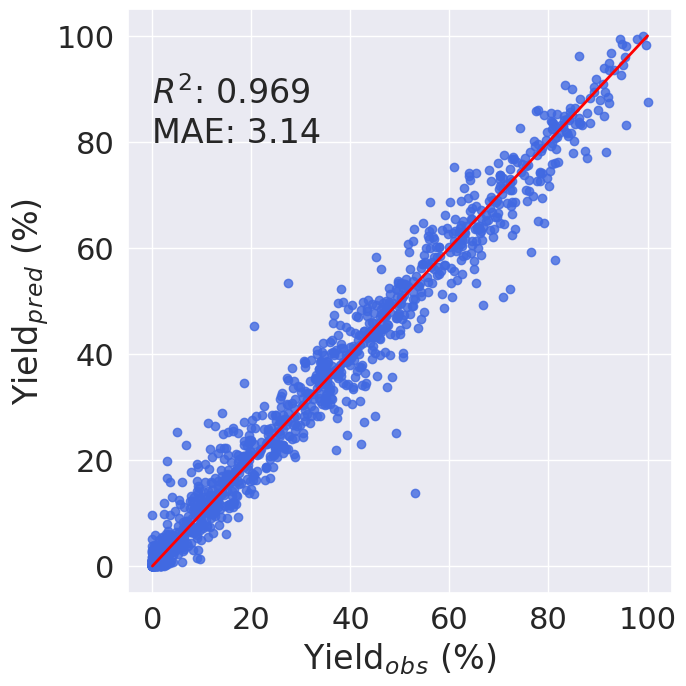

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

all_r2, all_mae, all_preds, all_targets = all_results["buchwald_hartwig"]
idx = 0  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid", font_scale=2)
plt.figure(figsize=(7, 7))
plt.scatter(x=targets.cpu().view(-1), y=preds.cpu().view(-1), color="royalblue", alpha=0.8)
plt.plot([0, 100], [0, 100], color="red", linestyle="-", linewidth=2)
plt.xticks(list(range(0, 120, 20)))
plt.yticks(list(range(0, 120, 20)))
plt.text(0, targets.cpu().view(-1).max() * 0.8, f"$R^2$: {r2:.3f}\nMAE: {mae:.2f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
plt.savefig("./3_png/BH_regression.png", dpi=400)

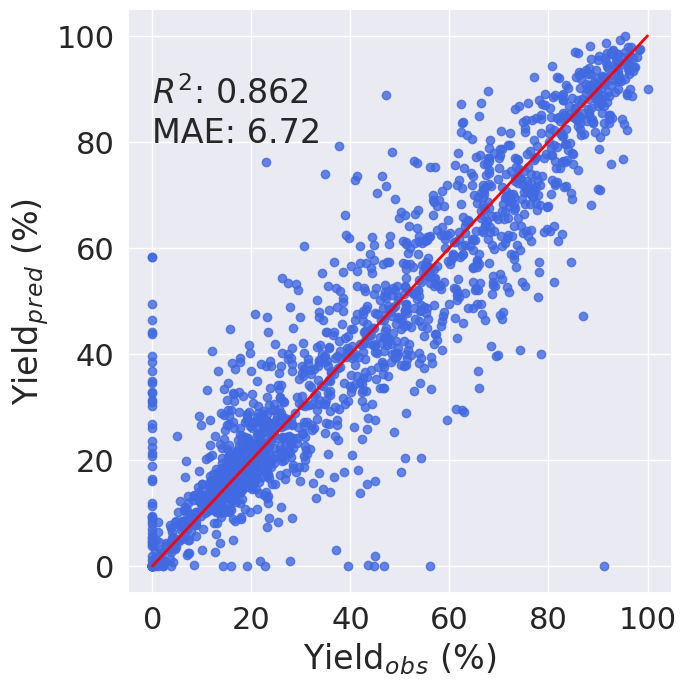

In [10]:
all_r2, all_mae, all_preds, all_targets = all_results["suzuki_miyaura"]
idx = 2  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid", font_scale=2)
plt.figure(figsize=(7, 7))
plt.scatter(x=targets.cpu().view(-1), y=preds.cpu().view(-1), color="royalblue", alpha=0.8)
plt.plot([0, 100], [0, 100], color="red", linestyle="-", linewidth=2)
plt.xticks(list(range(0, 120, 20)))
plt.yticks(list(range(0, 120, 20)))
plt.text(0, targets.cpu().view(-1).max() * 0.8, f"$R^2$: {r2:.3f}\nMAE: {mae:.2f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
plt.savefig("./3_png/SM_regression.png", dpi=400)
print()

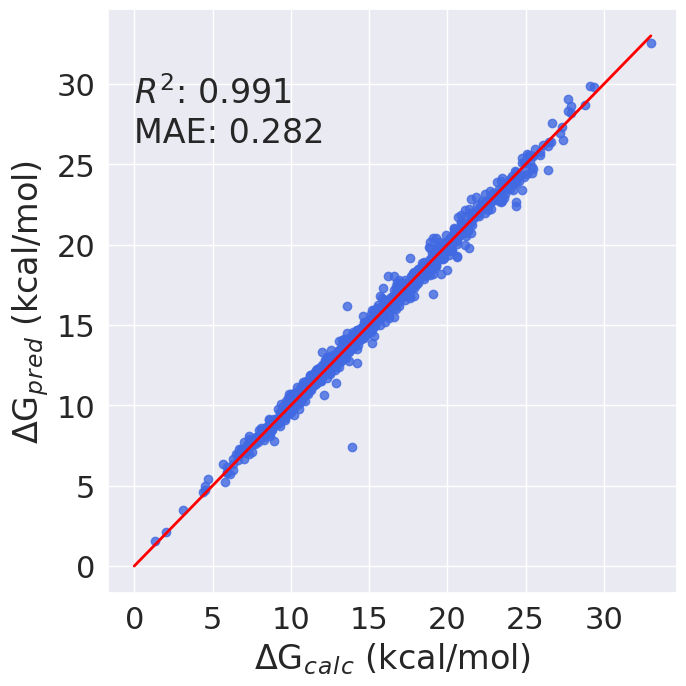

In [11]:
all_r2, all_mae, all_preds, all_targets = all_results["C_H_func"]
idx = 3  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid", font_scale=2)
plt.figure(figsize=(7, 7))
plt.scatter(x=targets.cpu().view(-1), y=preds.cpu().view(-1), color="royalblue", alpha=0.8)
plt.plot([0, 33], [0, 33], color="red", linestyle="-", linewidth=2)
plt.xticks(list(range(0, 35, 5)))
plt.yticks(list(range(0, 35, 5)))
plt.text(0, targets.cpu().view(-1).max() * 0.8, f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$G$_c$$_a$$_l$$_c$ (kcal/mol)")
plt.ylabel("$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./3_png/Radical_C-H_func_regression.png", dpi=400)
print()

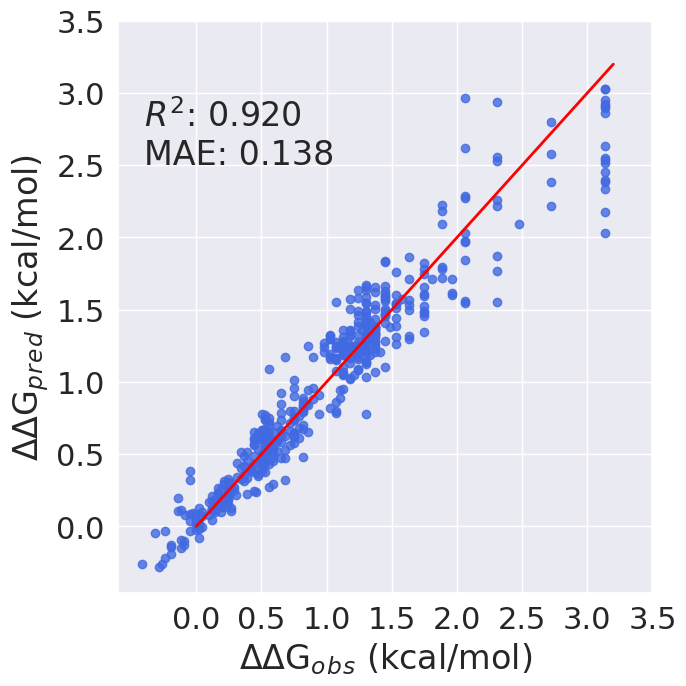

In [12]:
all_r2, all_mae, all_preds, all_targets = all_results["thiol_addition"]
idx = 3  ## 0 to 9
r2 = all_r2[idx]
mae = all_mae[idx]
preds = all_preds[idx]
targets = all_targets[idx]

sns.set_theme(style="darkgrid", font_scale=2)
plt.figure(figsize=(7, 7))
plt.scatter(x=targets.cpu().view(-1), y=preds.cpu().view(-1), color="royalblue", alpha=0.8)
plt.plot([0, 3.2], [0, 3.2], color="red", linestyle="-", linewidth=2)
plt.xticks(list(np.arange(0, 4.0, 0.5)))
plt.yticks(list(np.arange(0, 4.0, 0.5)))
plt.text(-0.4, targets.cpu().view(-1).max() * 0.8, f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./3_png/TA_regression.png", dpi=400)
print()

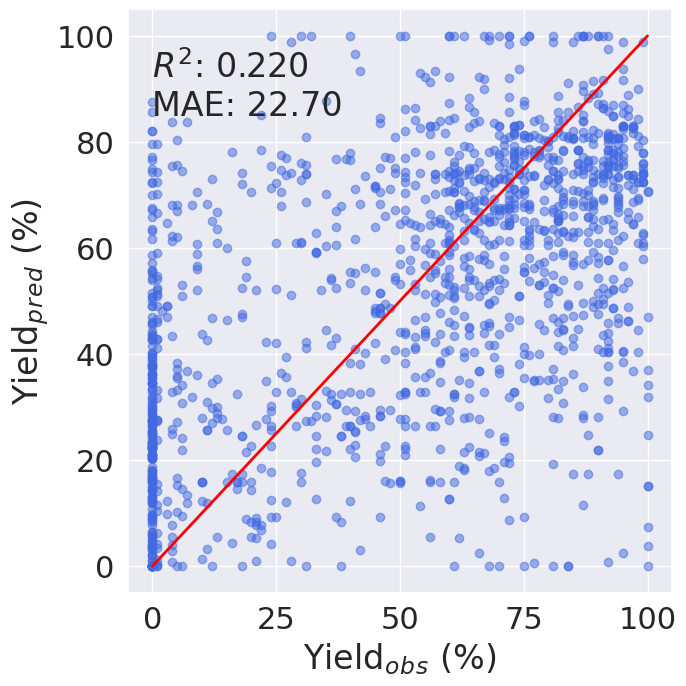

In [13]:
all_r2, all_mae, all_preds, all_targets, all_targets_class, all_preds_class = all_results["External_NiCOLit"]
r2 = r2_score(all_targets, all_preds)
mae = mean_absolute_error(all_targets, all_preds)
sns.set_theme(style="darkgrid", font_scale=2)
plt.figure(figsize=(7, 7))
plt.scatter(x=all_targets.reshape(-1), y=all_preds.reshape(-1), color="royalblue", alpha=0.5)
plt.plot([0, 100], [0, 100], color="red", linestyle="-", linewidth=2)
plt.text(0, all_targets.reshape(-1).max() * 0.85, f"$R^2$: {r2:.3f}\nMAE: {mae:.2f}")
plt.xlabel("Yield$_o$$_b$$_s$ (%)")
plt.ylabel("Yield$_p$$_r$$_e$$_d$ (%)")
plt.tight_layout(pad=0.5)
plt.savefig("./3_png/NiCOLit_Regression.png", dpi=400)

precision 0.7955112219451371
accuracy 0.7304409672830725


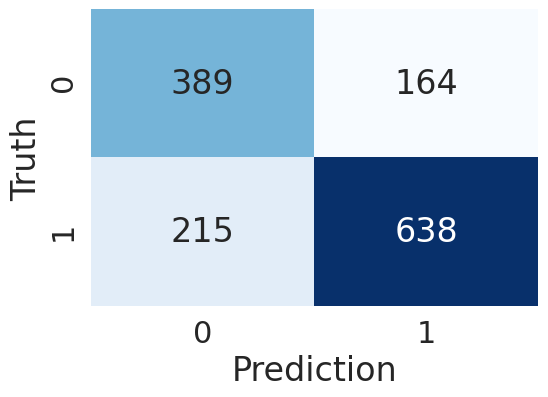

In [14]:
sns.set_theme(style="white", font_scale=2)
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

conf_mat = confusion_matrix(all_targets_class, all_preds_class)
precision = precision_score(all_targets_class, all_preds_class)
accuracy = accuracy_score(all_targets_class, all_preds_class)
plt.figure(figsize=(6, 4.5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
#plt.colorbar()
plt.xlabel("Prediction")
plt.ylabel("Truth")
#plt.title(f"Precision: {precision:.3f}")
plt.tight_layout()
plt.savefig("./3_png/NiCOLit_Classification.png", dpi=400)
print("precision", precision)
print("accuracy", accuracy)

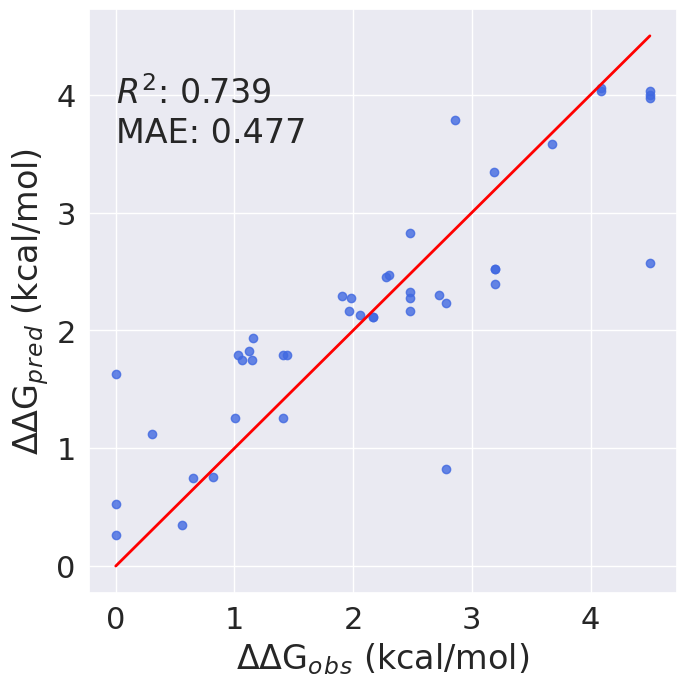

In [15]:
r2, mae, preds, targets = all_results["External_AHO"]
sns.set_theme(style="darkgrid", font_scale=2)
plt.figure(figsize=(7, 7))
plt.scatter(x=targets.cpu().view(-1), y=preds.cpu().view(-1), color="royalblue", alpha=0.8)
plt.plot([0, 4.5], [0, 4.5], color="red", linestyle="-", linewidth=2)
plt.xticks([0, 1.0, 2.0, 3.0, 4.0])
plt.yticks([0, 1.0, 2.0, 3.0, 4.0])
plt.text(0, targets.cpu().view(-1).max() * 0.8, f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./3_png/AHO_Regression.png", dpi=400)
print()

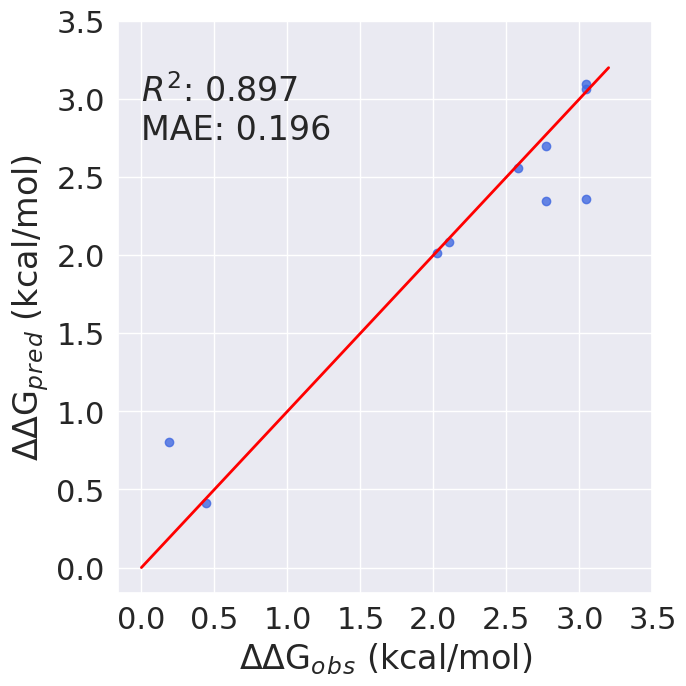

In [16]:
r2, mae, preds, targets = all_results["External_C–H_activation"]
sns.set_theme(style="darkgrid", font_scale=2)
plt.figure(figsize=(7, 7))
plt.scatter(x=targets.cpu().view(-1), y=preds.cpu().view(-1), color="royalblue", alpha=0.8)
plt.plot([0, 3.2], [0, 3.2], color="red", linestyle="-", linewidth=2)
plt.xticks(list(np.arange(0, 4.0, 0.5)))
plt.yticks(list(np.arange(0, 4.0, 0.5)))
plt.text(0, targets.cpu().view(-1).max() * 0.9, f"$R^2$: {r2:.3f}\nMAE: {mae:.3f}")
plt.xlabel("$\Delta$$\Delta$G$_o$$_b$$_s$ (kcal/mol)")
plt.ylabel("$\Delta$$\Delta$G$_p$$_r$$_e$$_d$ (kcal/mol)")
plt.tight_layout(pad=0.5)
plt.savefig("./3_png/C–H_activation_Regression.png", dpi=400)
print()